## Importing packages

In [90]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [142]:
boston = load_boston()

In [143]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
X, y = boston.data, boston.target

In [144]:
df.shape

(506, 13)

In [145]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [147]:
df['MEDV'] = y

In [148]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Split data to train and test

In [149]:
train_size = 0.8
train = df.sample(frac=train_size, random_state=0)
test = df.drop(train.index)

In [150]:
train.shape

(405, 14)

In [151]:
test.shape

(101, 14)

In [152]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]

In [153]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.5500,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.6930,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.4370,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85
227,0.41238,0.0,6.20,0.0,0.5040,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
148,2.33099,0.0,19.58,0.0,0.8710,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32
143,4.09740,0.0,19.58,0.0,0.8710,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42


In [154]:
y_train

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
279    35.1
227    31.6
148    17.8
143    15.6
334    20.7
Name: MEDV, Length: 405, dtype: float64

In [155]:
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

## Correlation

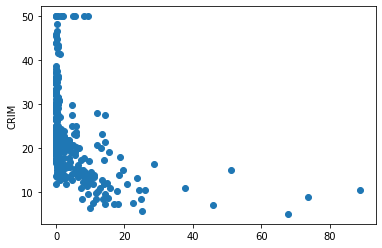

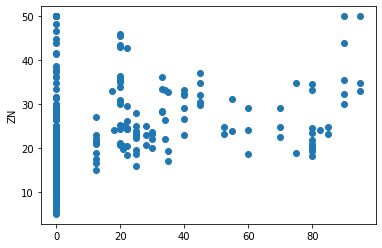

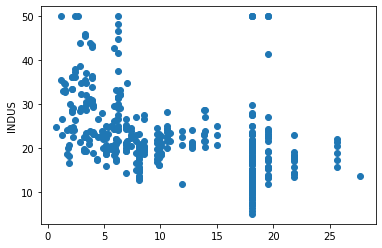

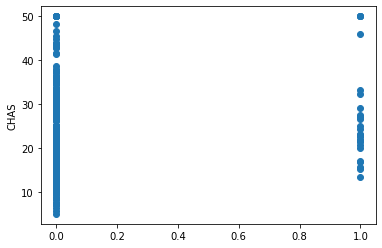

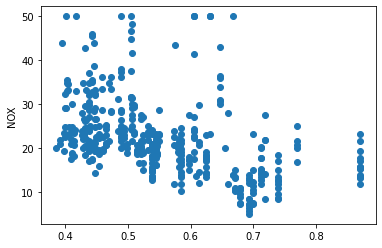

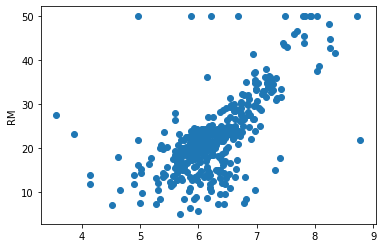

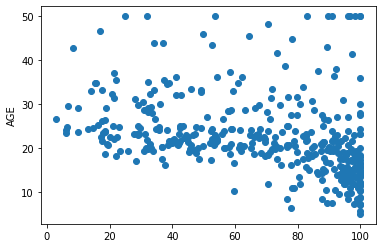

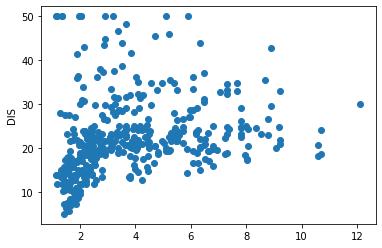

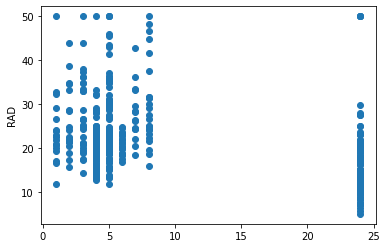

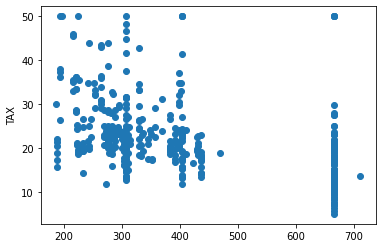

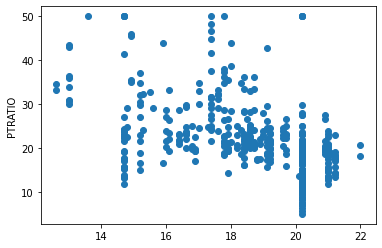

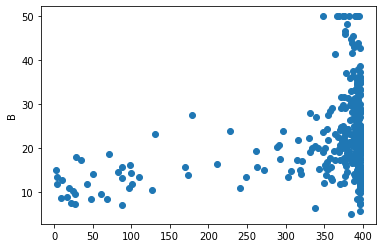

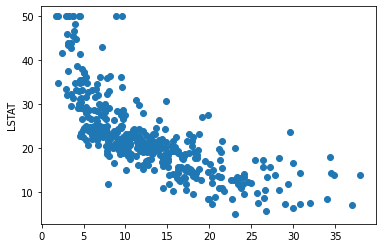

In [156]:
for column in X_train.columns:
    plt.scatter(X_train[column], y_train)
    plt.ylabel(column)
    plt.show()

In [157]:
X_tr = np.array(X_train)
y_train = np.array(y_train)

In [158]:
w = np.linalg.inv(X_train.T.dot(X_tr)).dot(X_tr.T).dot(y_train)
w.shape

(13,)

In [159]:
y_train_predicted = X_tr.dot(w)

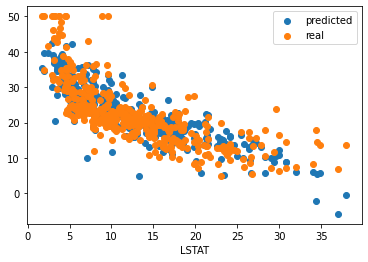

In [164]:
plt.scatter(X_train['LSTAT'], y_train_predicted, label="predicted")
plt.scatter(X_train['LSTAT'], y_train, label="real")
plt.legend()
plt.xlabel("LSTAT")
plt.show()

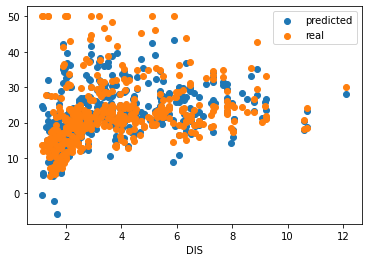

In [165]:
plt.scatter(X_train['DIS'], y_train_predicted, label="predicted")
plt.scatter(X_train['DIS'], y_train, label="real")
plt.legend()
plt.xlabel("DIS")
plt.show()